In [3]:
## 1. ライブラリのインポート
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools, Descriptors
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
print(rdBase.rdkitVersion) # 2019.03.2

2019.03.2


In [4]:
import os
import os.path
import sys

p_mod=os.path.join(os.environ['HOME'],'notebooks/99MyModules')
sys.path.append(p_mod)

import descarray as da

DataDir=os.path.join(os.environ['HOME'],'notebooks/50Data/')

In [5]:
df_AMES=pd.read_csv(DataDir+'ci900161g_si_001/smiles_cas_N6512.smi',sep='\t', header=None)
df_AMES.columns = ['smiles', 'CAS_NO', 'activity']
da.descDf(df_AMES)

サイズ:(6512, 3)


,smiles,CAS_NO,activity
0,O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...,2475-33-4,0
1,NNC(=O)CNC(=O)\C=N\#N,820-75-7,1
2,O=C1NC(=O)\C(=N/#N)\C=N1,2435-76-9,1
3,NC(=O)CNC(=O)\C=N\#N,817-99-2,1
4,CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O,116539-70-9,1


In [6]:
TarDir=DataDir+'SDF_R'

L_FP=[]
for f in os.listdir(TarDir):
    D_sdf={}
    if f.endswith('.sdf'):
        D_sdf['FN']=f
        D_sdf['RP']=os.path.join(TarDir,f)
        L_FP.append(D_sdf)
len(L_FP)

999

In [12]:
D_sdf=L_FP[1]
l_m=[]
for D_sdf in L_FP:
    with open(D_sdf['RP'],'rb') as f:
        suppl=Chem.ForwardSDMolSupplier(f)
    #     print(f.read().decode('utf8'))
        for m in suppl:
            if m is not None:
                l_m.append(m)
    #             print(list(m.GetPropNames()))

In [59]:
s_allsdf=''
for i in range(1,10):
    D_sdf=L_FP[i]
    with open(D_sdf['RP'],'rb') as f:
        s_allsdf=s_allsdf+f.read().decode()

In [57]:
WriFN='01PCCDBall.sdf'
with open(WriFN,'w') as f:
    f.write(s_allsdf)

In [58]:
# D_sdf=L_FP[1]
PandasTools.LoadSDF(WriFN)

""


In [22]:
D_sdf['RP']

'/home/jovyan/notebooks/50Data/SDF_R/PCCID_00000003_NS.sdf'

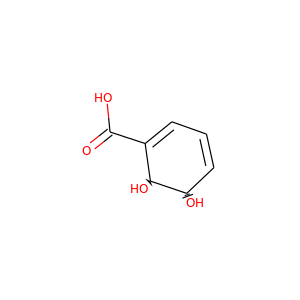

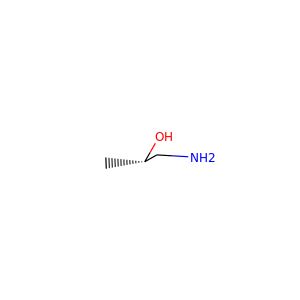

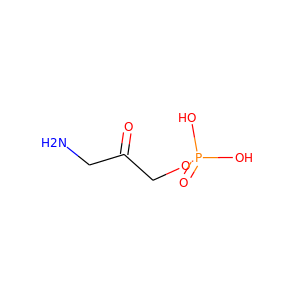

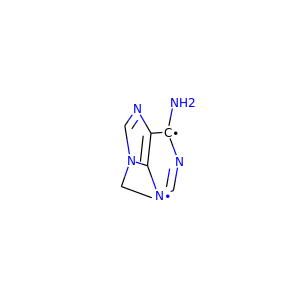

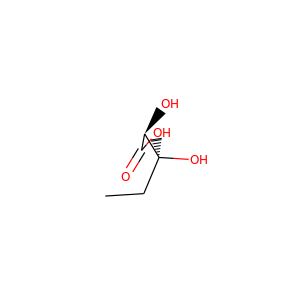

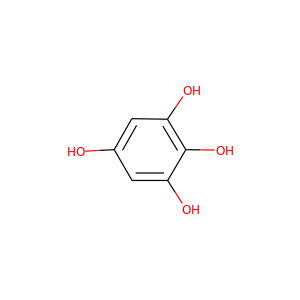

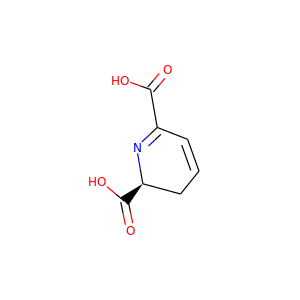

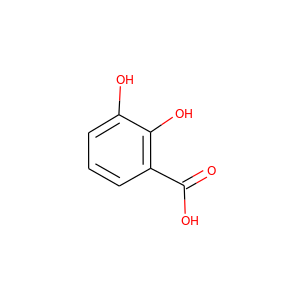

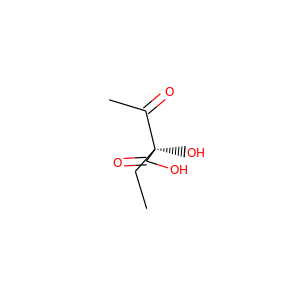

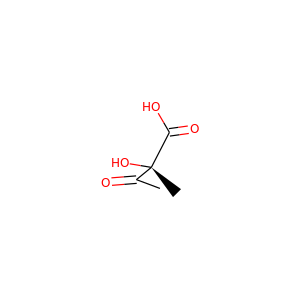

In [18]:
for i in range(10):
    display(Draw.MolToImage(l_m[i]))

In [12]:
from rdkit.Chem.Draw import IPythonConsole

In [118]:
Tes_F='./PCCID_00000004_NS.sdf'
with open(Tes_F,'rb') as f:
    suppl=Chem.ForwardSDMolSupplier(f)
#     print(f.read().decode('utf8'))
    for m in suppl:
        if m is not None:
            l_PN=list(m.GetPropNames())

In [117]:
l_PN

['HBA',
 'HBD',
 'TPSA',
 'cid',
 'dipole',
 'excitation_energy_1',
 'excitation_energy_2',
 'excitation_energy_3',
 'excitation_energy_4',
 'homo_energy',
 'homo_lumo_gap',
 'logP',
 'lumo_energy',
 'melting_point',
 'molecular_refractivity',
 'oscillator_strength_1',
 'oscillator_strength_2',
 'oscillator_strength_3',
 'oscillator_strength_4',
 'open_babel_can_smiles',
 'mulliken_charges',
 'lowdin_charges']

In [107]:
D_sdf['RP']

'/home/jovyan/notebooks/50Data/SDF_R/PCCID_00000007_NS.sdf'